## Exercice 1 Classification system

## a. Getting started

a) Read the training data from file
ex1-data-train.csv
. The first two columns are
x
1
and
x
2
. The last column holds the class label
y

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi,exp

%matplotlib inline

your_data_path = './ex1-data-train.csv'

dataset = pd.read_csv(your_data_path,names=['x1','x2','y'])
dataset.head()

# load data into variables
x1 = dataset['x1'].values
x2 = dataset['x2'].values
y = dataset['y'].values

# and a list for each coordinate
x1_0 = []
x1_1 = []
x2_0 = []
x2_1 = []

for i in np.arange(len(x1)):
    if y[i] == 0:
        x1_0.append(x1[i])
        x2_0.append(x2[i])
    else:
        x1_1.append(x1[i])
        x2_1.append(x2[i])

b) Compute the priors of both classes P(C0) and P(C1)

In [8]:
N = len(y)
prior0 = 1.0 * len(x1_0) / N
prior1 = 1.0 * len(x1_1) / N
print(prior0, prior1)


0.4 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy histogram(a,bins=’auto’) function.

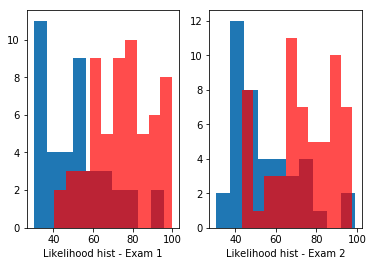

In [9]:
x1_0_hvals,x1_0_binedges = np.histogram(x1_0)
x1_1_hvals,x1_1_binedges = np.histogram(x1_1)
x2_0_hvals,x2_0_binedges = np.histogram(x2_0)
x2_1_hvals,x2_1_binedges = np.histogram(x2_1)

plt.subplot(1, 2, 1)
plt.hist(x1_0)
plt.hist(x1_1,color='red',alpha=0.7)
plt.xlabel('Likelihood hist - Exam 1')
plt.subplot(1, 2, 2)
plt.hist(x2_0,)
plt.hist(x2_1,color='red',alpha=0.7)
plt.xlabel('Likelihood hist - Exam 2')
plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function likelihoodHist(x,histValues,edgeValues) that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy histogram() function).

In [13]:
def likelihood_hist(x,histValues,edgeValues):
    for i in np.arange(len(histValues)):
        if (x>edgeValues[i]) and (x<=edgeValues[i+1]):
            return 1.0 * histValues[i]
    return 0.0000001 #out of bounds of histogram, return very small value

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
— using only feature x1
— using only feature x2
— using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e.
p(X|Ck) = p(x1|Ck) · p(x2|Ck) Which system is the best ?

In [14]:
# using x1
missed = 0
for x in x1_0:
    if prior0 * likelihood_hist(x,x1_0_hvals,x1_0_binedges) < prior1 * likelihood_hist(x,x1_1_hvals,x1_1_binedges):
        missed+=1
for x in x1_1:
    if prior0 * likelihood_hist(x,x1_0_hvals,x1_0_binedges) > prior1 * likelihood_hist(x,x1_1_hvals,x1_1_binedges):
        missed+=1
print('error rate using x1 = ', 100.0 * missed/N)

# using x2
missed = 0
for x in x2_0:
    if prior0 * likelihood_hist(x,x2_0_hvals,x2_0_binedges) < prior1 * likelihood_hist(x,x2_1_hvals,x2_1_binedges):
        missed+=1
for x in x2_1:
    if prior0 * likelihood_hist(x,x2_0_hvals,x2_0_binedges) > prior1 * likelihood_hist(x,x2_1_hvals,x2_1_binedges):
        missed+=1
print('error rate using x2 = ', 100.0 * missed/N)

# using x1 and x2, naive bayes
missed = 0
for i in np.arange(len(x1_0)):
    if   prior0 * likelihood_hist(x1_0[i],x1_0_hvals,x1_0_binedges) * likelihood_hist(x2_0[i],x2_0_hvals,x2_0_binedges) \
       < prior1 * likelihood_hist(x1_0[i],x1_1_hvals,x1_1_binedges) * likelihood_hist(x2_0[i],x2_1_hvals,x2_1_binedges):
        missed+=1
for i in np.arange(len(x1_1)):
    if prior0 * likelihood_hist(x1_1[i],x1_0_hvals,x1_0_binedges) * likelihood_hist(x2_1[i],x2_0_hvals,x2_0_binedges) \
       > prior1 * likelihood_hist(x1_1[i],x1_1_hvals,x1_1_binedges) * likelihood_hist(x2_1[i],x2_1_hvals,x2_1_binedges):
        missed+=1
print('error rate using x1 and x2 = ', 100.0 * missed/N)

error rate using x1 =  21.0
error rate using x2 =  22.0
error rate using x1 and x2 =  10.0


The best one is when using both exams x1 and x2.

## b. Bayes - Univariate Gaussian distribution

Do the same as in a. but this time using univariate Gaussian distribution to model the like- lihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions mean() and var() to compute the mean μ and variance σ2 of the distribution. To model the likeli- hood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [17]:
def likelihood_univariate_gaussian(x, mean, var):
    a = 1.0 / ((2.0 * pi * var)**0.5)
    res = np.power(x - mean,2) * -((1.0)/(2.0*var))
    res = np.exp(res)
    res = res * a 
    return res

N = len(y)
prior0 = 1.0 * len(x1_0) / N
prior1 = 1.0 * len(x1_1) / N
print(prior0, prior1)

# using x1
missed = 0
var_01 = np.var(x1_0)
mean_01 = np.mean(x1_0)
var_11 = np.var(x1_1)
mean_11 = np.mean(x1_1)

for x in x1_0:
    if prior0 * likelihood_univariate_gaussian(x, mean_01, var_01) < prior1 * likelihood_univariate_gaussian(x, var_11, var_11):
        missed += 1
for x in x1_1:
    if prior0 * likelihood_univariate_gaussian(x, mean_01, var_01) > prior1 * likelihood_univariate_gaussian(x, var_11, var_11):
        missed += 1
print('Error rate using x1 = ', 100.0 * missed/N)

# using x2
missed = 0
var_02 = np.var(x2_0)
mean_02 = np.mean(x2_0)
var_12 = np.var(x2_1)
mean_12 = np.mean(x2_1)

for x in x2_0:
    if prior0 * likelihood_univariate_gaussian(x,mean_02,var_02) < prior1 * likelihood_univariate_gaussian(x,mean_12,var_12):
        missed+=1
for x in x2_1:
    if prior0 * likelihood_univariate_gaussian(x,mean_02,var_02) > prior1 * likelihood_univariate_gaussian(x,mean_12,var_12):
        missed+=1
print('Error rate using x2 = ', 100.0 * missed/N)

# using x1 and x2, naive bayes
missed = 0
for i in np.arange(len(x1_0)):
    if prior0 * likelihood_univariate_gaussian(x1_0[i],mean_01,var_01) * likelihood_univariate_gaussian(x2_0[i],mean_02,var_02) < prior1 * likelihood_univariate_gaussian(x1_0[i],mean_11,var_11) * likelihood_univariate_gaussian(x2_0[i],mean_12,var_12):
        missed += 1
for i in np.arange(len(x1_1)):
    if prior0 * likelihood_univariate_gaussian(x1_1[i],mean_01,var_01) * likelihood_univariate_gaussian(x2_1[i],mean_02,var_02) > prior1 * likelihood_univariate_gaussian(x1_1[i],mean_11,var_11) * likelihood_univariate_gaussian(x2_1[i],mean_12,var_12):
        missed += 1
print('Error rate using x1 and x2 = ', 100.0 * missed/N)

0.4 0.6
error rate using x1 =  60.0
error rate using x2 =  25.0
error rate using x1 and x2 =  7.0


##Exercice 2 System evaluation

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


your_data_path = '/Users/lorenz/Documents/ML-PW-2018/PW03/ex2-system-a.csv'

datasetA = pd.read_csv(your_data_path, sep=';', index_col=False, names=['0','1','2','3','4','5','6','7','8','9','y_true'])
class_names = ['0','1','2','3','4','5','6','7','8','9']
nb_classes = len(class_names)

datasetA.head()


,0,1,2,3,4,5,6,7,8,9,y_true
0,5.348450e-08,7.493480e-10,8.083470e-07,2.082290e-05,5.222360e-10,2.330260e-08,5.241270e-12,9.999650e-01,4.808590e-07,0.000013,7
1,1.334270e-03,3.202960e-05,8.504280e-01,1.669090e-03,1.546460e-07,2.412940e-04,1.448280e-01,1.122810e-11,1.456330e-03,0.000011,2
2,3.643050e-06,9.962760e-01,2.045910e-03,4.210530e-04,2.194020e-05,1.644130e-05,2.838160e-04,3.722960e-04,5.150120e-04,0.000044,1
3,9.998200e-01,2.550390e-10,1.112010e-05,1.653200e-05,5.375730e-10,8.999750e-05,9.380920e-06,4.464470e-05,2.418440e-06,0.000006,0
4,2.092460e-08,7.464220e-08,3.560820e-05,5.496200e-07,9.988960e-01,3.070920e-08,2.346150e-04,9.748010e-07,1.071610e-06,0.000831,4


a) Write a function to take classification decisions on such outputs according to Bayes’rule.

In [84]:
def a_posteriori_probability(df):
    y_true = df['y_true'].values
    nb_classes = np.unique(y_true).size
    # counting label apparition
    label_count = np.array([(df['y_true'] == i).sum() for i in range(0,nb_classes)],dtype=np.float64)

    # a priori probability for each class
    a_priori = (label_count / label_count.sum())
    
    
    
    # likelihoods
    likelihoods = df[class_names].values
    
    a_posteriori = [l * a_priori for l in likelihoods]
    a_posteriori_label = np.argmax(a_posteriori,axis=1)
    return a_posteriori_label


y_pred_A = a_posteriori_probability(datasetA)
y_true = datasetA['y_true'].values

b) What is the overall error rate of the system ?

In [86]:
overall_error_rate = 1 - ((y_pred_A == y_true).sum() * 1.0) / y_true.size
print('Overall rate of the system : ', overall_error_rate)

Overall rate of the system :  0.8925


c) Compute and report the confusion matrix of the system.

In [95]:
from sklearn.metrics import confusion_matrix
verif_cm = confusion_matrix(y_true,y_pred_A)

def confusion_matrix2(y_true, y_pred, nb_classes):
    m = [[0] * nb_classes for i in range(nb_classes)]
    for pred, exp in zip(y_pred, y_true):
        m[pred][exp] += 1
    return np.array(m)

cm_A = confusion_matrix2(y_pred_A,y_true,nb_classes)
# verification for our confusion matrix function
print((cm_A == verif_cm).sum() == nb_classes**2)


True


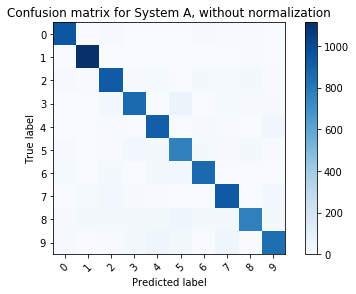

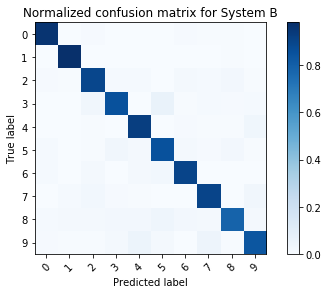

In [111]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(cm_A, classes=class_names,title='Confusion matrix for System A, without normalization')

plt.figure()
plot_confusion_matrix(cm_A, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for System B')

plt.show()

d) What are the worst and best classes in terms of precision and recall ?

In [97]:
def recall_per_class(cm):
    end = cm.shape[0]
    tp = np.array([cm[i,i] for i in range (0,cm.shape[0])],dtype=np.float64)
    fn = np.array([(cm[i,np.r_[0:i,(i+1):end]]).sum() for i in range(0,cm.shape[0])],dtype=np.float64)
    return tp / (tp + fn)

In [98]:
recalls = recall_per_class(cm_A)

best_class = np.argmax(recalls)
worst_class = np.argmin(recalls)
print('best class : ',best_class,'[',recalls[best_class],']')
print('worst class : ',worst_class,'[',recalls[worst_class],']')
print(recalls)

best class :  1 [ 0.9806167400881057 ]
worst class :  8 [ 0.7885010266940452 ]
[0.96326531 0.98061674 0.89437984 0.85544554 0.92566191 0.85762332
 0.90292276 0.9036965  0.78850103 0.83746283]


e) In file ex1-system-b.csv you find the output of a second system B. What is the best system between (a) and (b) in terms of error rate and F1.

In [103]:
# load data
your_data_path = '/Users/lorenz/Documents/ML-PW-2018/PW03/ex2-system-b.csv'

datasetB = pd.read_csv(your_data_path, sep=';', index_col=False, names=['0','1','2','3','4','5','6','7','8','9','y_true'])
datasetB.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,1.675320e-11,2.584750e-11,1.796600e-07,1.229790e-05,6.932370e-16,2.499490e-11,3.506180e-16,9.999870e-01,9.081160e-11,1.482410e-09,7
1,2.348330e-08,1.081260e-06,9.999700e-01,2.765590e-05,3.209940e-12,4.008910e-09,1.594070e-06,3.191980e-12,1.573330e-07,9.856860e-12,2
2,5.653110e-09,9.997150e-01,2.231520e-04,6.524200e-06,4.818190e-07,1.273150e-07,2.173000e-06,1.416840e-05,3.833510e-05,6.327910e-08,1
3,9.999860e-01,1.825320e-10,9.027630e-06,8.147850e-09,7.237800e-12,3.341060e-09,1.152500e-06,3.915740e-06,7.381230e-11,4.782200e-08,0
4,1.349270e-08,2.039600e-10,3.194220e-07,1.773480e-10,9.996150e-01,1.231720e-08,2.821290e-07,2.402690e-06,1.690530e-08,3.820520e-04,4


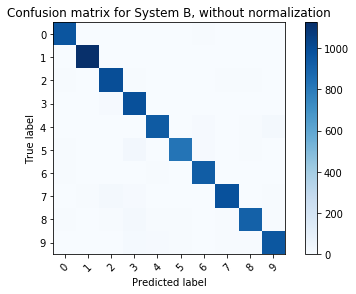

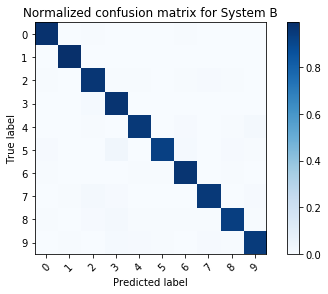

In [110]:
y_pred_B = a_posteriori_probability(datasetB)
cm_B = confusion_matrix2(y_pred_B,y_true,nb_classes)

plt.figure()
plot_confusion_matrix(cm_B, classes=class_names,title='Confusion matrix for System B, without normalization')

plt.figure()
plot_confusion_matrix(cm_B, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for System B')

plt.show()

In [106]:
def system_precision(cm):
    tp = np.array([cm[i,i] for i in range (0,cm.shape[0])],dtype=np.float64).sum()
    fp = np.sum([(cm[i,0:i]).sum() for i in range(0,cm.shape[0])])
    return tp / (tp + fp)


def system_recall(cm):
    tp = np.array([cm[i,i] for i in range (0,cm.shape[0])],dtype=np.float64).sum()
    fn = np.sum([(cm[i,i+1:cm.shape[0]]).sum() for i in range(0,cm.shape[0])])
    return tp / (tp + fn)


def system_accuracy(cm):
    # sum of the diagonal
    tp = np.array([cm[i,i] for i in range (0,cm.shape[0])],dtype=np.float64).sum()
    return tp / cm.sum()
   
    
def f1_score(cm):
    precision = system_precision(cm)
    recall = system_recall(cm)
    return 2 * ((precision * recall)/(precision + recall))

In [107]:
print('System A\n\trecall : ',system_recall(cm_A),'\n\tprecision : ',system_precision(cm_A),'\n\taccuracy : ',system_accuracy(cm_A),'\n\tf1-score : ',f1_score(cm_A))
print('System B\n\trecall : ',system_recall(cm_B),'\n\tprecision : ',system_precision(cm_B),'\n\taccuracy : ',system_accuracy(cm_B),'\n\tf1-score : ',f1_score(cm_B))

System A
	recall :  0.9536275243081526 
	precision :  0.932991846121681 
	accuracy :  0.8925 
	f1-score :  0.9431968295904888
System B
	recall :  0.984533442589368 
	precision :  0.9759366433140421 
	accuracy :  0.9612 
	f1-score :  0.9802161941668367


System B is has the higher scores and accuracy. 

## Exercice 3 System evaluation

a) How would you build a Bayesian classification for the same task ? Comment on the prior probabilities and on the likelihood estimators. More specifically, what kind of estimator could we use in this case ?


I will try a naive bayes, where all prixels are independend. This is a strong assumbtion and probably not true for a picture. 
Prior probabilities should not matter as long as I do not choose 0 or 1 (never do that!).

b) Optional : implement it and report performance !

In [94]:
import pandas as pd
import numpy as np
import os
from scipy.stats import multivariate_normal as MVN

your_data_path = '/Users/lorenz/Documents/ML-PW-2018/PW03/mnist/'

def load_MNIST(ROOT):
  '''load all of mnist
  training set first'''
  Xtr = []
  train = pd.read_csv(os.path.join(ROOT, 'mnist_train.csv'))
  X = np.array(train.drop('label', axis=1))
  Ytr = np.array(train['label'])
  # With this for-loop we give the data a shape of the acctual image (28x28)
  # instead of the shape in file (1x784)
  for row in X:
      Xtr.append(row.reshape(28,28))
  # load test set second
  Xte = []
  test = pd.read_csv(os.path.join(ROOT, 'mnist_test.csv'))
  X = np.array(test.drop('label', axis=1))
  Yte = np.array(test['label'])
  # same reshaping
  for row in X:
      Xte.append(row.reshape(28,28))
  
  return np.array(Xtr), np.array(Ytr), np.array(Xte), np.array(Yte)


In [95]:
X_train, y_train, X_test, y_test = load_MNIST(your_data_path)

In [207]:
def calculate_mean_and_var(X, Y, s = 0.0001):
    labels = set(Y)
    gaussians = {}  
    prior = {}
    for label in labels:
        x = X[Y == label]
        gaussians[label] = {'mean': x.mean(axis=0),
                          'var': x.var(axis=0) + s,
                            }
        prior[label] = float(len(Y[Y == key]) / len(Y))
        
    return gaussians, prior
    

class_gaussians, count_prior = calculate_mean_and_var(X_train, y_train)




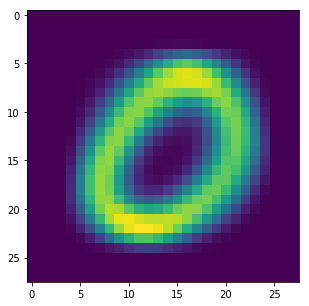

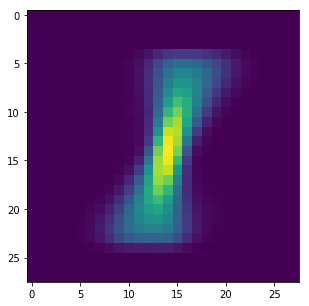

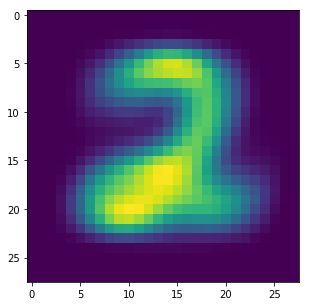

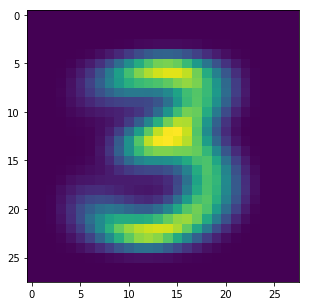

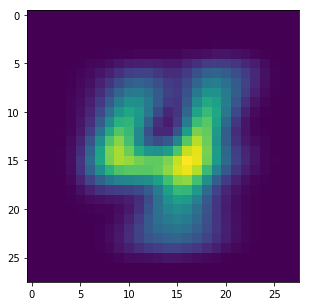

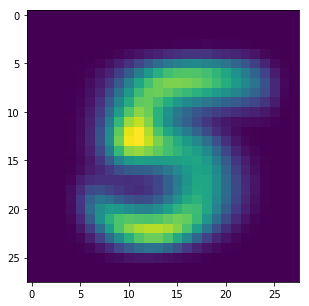

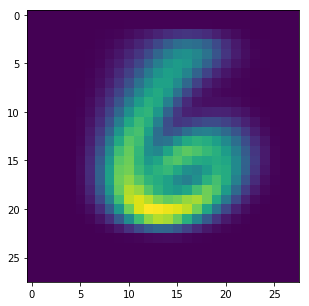

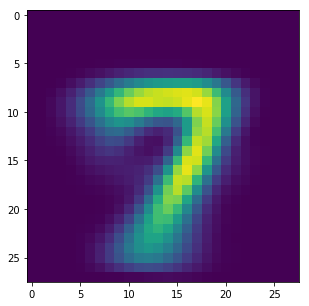

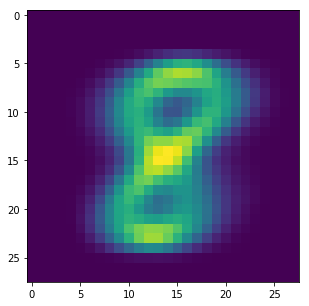

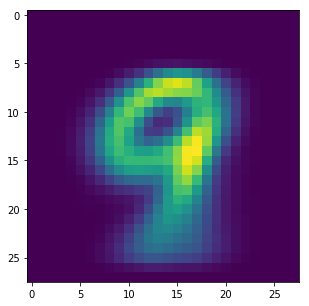

In [196]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)

# lets have a look at what the "mean" of the numbers look like
for key in class_gaussians: 
    plt.imshow(class_gaussians[key]['mean'].astype('uint8'))
    plt.show()



In [204]:
def predict_class(X, gaussians, prior):
    X = np.reshape(X, (X.shape[0], -1))
    N = len(X)
    K = len(gaussians)
    predict = np.zeros((N, K))
    for key, value in gaussians.items():
        mean, var = value['mean'], value['var']
        # we flatten the "mean" and "var" for MVN
        mean = [i for x in mean for i in x]
        var = [i for x in var for i in x]
        if isinstance(prior, float):
            predict[:,key] = MVN.logpdf(X, mean, var) + prior
        else:
            predict[:,key] = MVN.logpdf(X, mean, var) + prior[key]
    return np.argmax(predict, axis=1)



In [220]:
prior_mnist = 0.1 
# I assume that random numbers from 0 - 9 are equally probably
# We learned in class, that the prior should be overcome by the data. 

test_predict = predict_class(X_test, class_gaussians, prior_mnist)
test_score = np.mean(test_predict == y_test)

print('We get an accuracy of %s in the test set' % (test_score))

We get an accuracy of 0.571 in the test set


In [219]:
# Here I try with the prior that was counted 
test_predict = predict_class(X_test, class_gaussians, count_prior)
test_score = np.mean(test_predict == y_test)

print('We get an accuracy of %s in the test set. A different prior does not help (what we expect)' % (test_score))

We get an accuracy of 0.571 in the test set. A different prior does not help (what we expect)


We can see that the classification is not very good. This can be due to a mistake in my implementation, that I can not find. Or if could mean, that the naive gaussian approach is not very good.
